In [24]:
import pandas as pd
import numpy as np   
import matplotlib.pyplot as plt

In [25]:
def mm_cross_simple(df,col_price,mm_short,mm_long):
    mm_short_name = str(mm_short) + 'MA'
    mm_long_name = str(mm_long) + 'MA'
    signal_mm = mm_short_name + mm_long_name
    df[mm_short_name] = df[col_price].rolling(window=mm_short).mean()
    df[mm_long_name] = df[col_price].rolling(window=mm_long).mean()
    df[signal_mm] = np.where(df[mm_short_name] > df[mm_long_name], 1,-1)
    return df

In [29]:
wd_input = '/Users/alexandrucristiean/Desktop/Pascal_C/'
df = pd.read_csv('{}/sample_data.csv'.format(wd_input),delimiter = ',')   #price data

#for variables values: float
mm_short = 5
mm_long = 20
#col title in the df
signal_ma = str(mm_short) + 'MA' + str(mm_long) + 'MA'
tc = .002               #transaction costs 0.05%

In [30]:
df['price'] = df['price'].astype(float)
df['date'] = df['time']/1000                      #binance time is in milliseconds-> transform in seconds
df['date'] = pd.to_datetime(df['date'], unit='s') #format binance date in readable date 

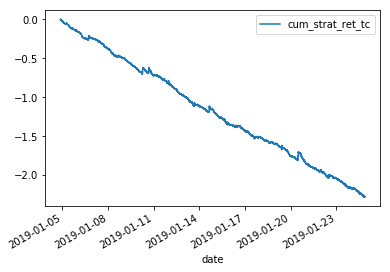

In [31]:
#signal calcul
df = mm_cross_simple(df,'price',mm_short,mm_long)   #add in df above: short_ma, long_ma, signal_mm

df['signal'] = df[signal_ma]                                               #create df signal: sell if -1 and buy if +1
df['signal_chg'] = np.where(df['signal'] != df['signal'].shift(1), 1,0)    #count signal change, then number of trades
df['tc'] = df['signal_chg'] * tc                                           #calc transactions cost
df['tc'] = df['tc'].cumsum()
#return calculations
df['return'] = (df['price'] / df['price'].shift(1))-1                      #calc returns per minute for the series
df['cum_return'] = (1 + df['return']).cumprod() - 1                        #calc cumulated returns for the series
df['strat_ret'] = df['return'] * df ['signal']                             #calc strategy returns per minute for the series
df['cum_strat_ret'] = (1 + df['strat_ret']).cumprod() - 1                  #calc strategy cumulated returns
df['cum_strat_ret_tc'] = df['cum_strat_ret'] - df['tc']                    #remove transactions costs

df.plot(x = 'date', y='cum_strat_ret_tc')                                  #graph the strategy returns 

In [16]:
print(df['cum_strat_ret'][df['cum_strat_ret'].size-1])                     # last element of Series df[..]
print(type(df['cum_strat_ret']))                                           # last element of Series df[..]

1.4865307916084882
<class 'pandas.core.series.Series'>
